# Proyecto análisis de negocio

El presente proyecto tiene como objetivo ayudar a optimizar los gastos de marketing de la página web Y.Afisha. Específicamente se investigarán los siguientes puntos: cómo los clientes usan el servicio; cuándo empiezan a comprar; cuánto dinero aporta cada cliente a la compañía; cuándo los ingresos cubren el costo de adquisición de los clientes.

## Inicialización y carga de datos

In [1]:
#importación de librerías a usar en el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
    

In [2]:
# carga de datos en dataframes
visits = pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device':'category'},parse_dates=['Start Ts','End Ts'])
orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
costs = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])

## Exploración inicial y preparación de datos

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [5]:
# se pasarán los nombres de las columnas al formato snake case y en minúsculas
columns_new = {
    'Device':'device',
    'End Ts':'end_ts',
    'Source Id':'source_id',
    'Start Ts':'start_ts',
    'Uid':'uid'
}
visits.rename(columns = columns_new,inplace=True)

In [6]:
# se convertirá la columna "uid" a tipo string
visits["uid"]= visits["uid"].astype("str")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(1), object(1)
memory usage: 11.3+ MB


In [7]:
visits.duplicated().sum()

0

No existen filas duplicadas en el dataframe

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [10]:
# se pasarán los nombres de las columnas al formato snake case y en minúsculas
columns_new_orders = {
    'Buy Ts':'buy_ts',
    'Revenue':'revenue',
    'Uid':'uid'
}
orders.rename(columns = columns_new_orders,inplace=True)

In [11]:
# se convertirá la columna "uid" a tipo string
orders["uid"]= orders["uid"].astype("str")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [12]:
orders.duplicated().sum()

0

No existen filas completamente duplicadas en dataframe orders

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
costs.head(10)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [15]:
costs.duplicated().sum()

0

No existen filas completamente duplicadas en el dataframe costs

## Análisis de datos

### Visitas

**¿Cuántas personas lo usan cada día, semana y mes?**

In [16]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] =visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [17]:
dau_total= visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()
dau_total.columns = ['session_date','number_of_users']
dau_total

,session_date,number_of_users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


907.99


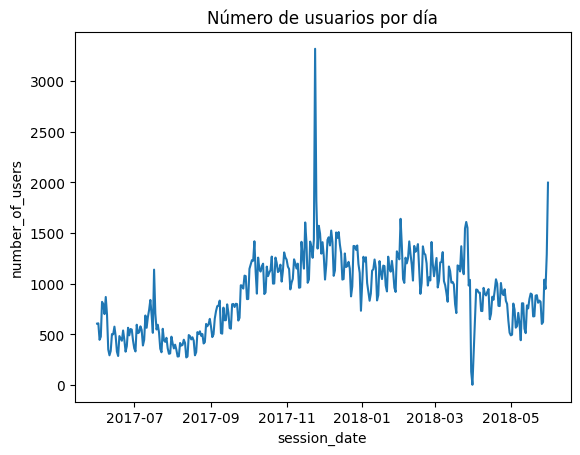

In [18]:
plt.title('Número de usuarios por día')
sns.lineplot(data=dau_total, x='session_date',y='number_of_users')
print(dau_total['number_of_users'].mean().round(2))

En promedio 907 usuarios(as) visitan la página web cada día. Además, el gráfico muestra que hubo un pico marcado en el número de usuarios(as) hacia finales del 2017 llegando a registrar alrededor de 3000 usuarios. Después de dicha fecha, se muestra una tendencia hacia la baja en el número de usuarios por día. Sin embargo, hacia los últimos meses registrados, se puede ver que número de usuarios por día vuelve a crecer de nuevo.  

In [19]:
wau_total = visits.groupby(['session_year','session_week']).agg({'uid':'nunique'}).reset_index()
wau_total.columns = ['session_year','session_week','number_of_users']
wau_total.head()

,session_year,session_week,number_of_users
0,2017,2017-06-01,4082
1,2017,2017-06-08,3311
2,2017,2017-06-15,2844
3,2017,2017-06-22,3079
4,2017,2017-06-29,3055


5621.7


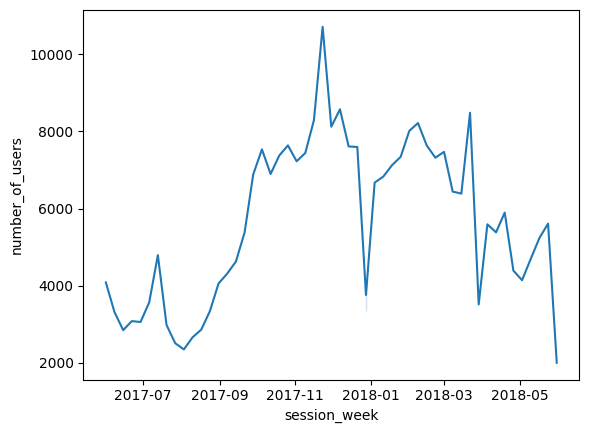

In [20]:
#plt.title('Número de usuarios por semana')
sns.lineplot(data=wau_total, x='session_week',y='number_of_users')
print(wau_total['number_of_users'].mean().round(2))

En promedio 5621 usuarios(as) visitan la página web cada semana. Al igual que el gráfico anterior, se muestra que el número de usuarios(as) por semana va incrementando hacia finales del 2017 alcanzando los 10000 usuarios(as) en una semana. Sin embargo, se registra un descenso marcado hacia inicios del 2018 y, si bien, en las siguientes semanas el número de usuarios(as) incrementa, esta métrica vuelve a caer llegando a mediados del 2018.

In [21]:
mau_total = visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).reset_index()
mau_total.columns = ['sesion_year','session_month','number_of_users']
mau_total

,sesion_year,session_month,number_of_users
0,2017,2017-06-01,13259
1,2017,2017-07-01,14183
2,2017,2017-08-01,11631
3,2017,2017-09-01,18975
4,2017,2017-10-01,29692
5,2017,2017-11-01,32797
6,2017,2017-12-01,31557
7,2018,2018-01-01,28716
8,2018,2018-02-01,28749
9,2018,2018-03-01,27473


23228.42


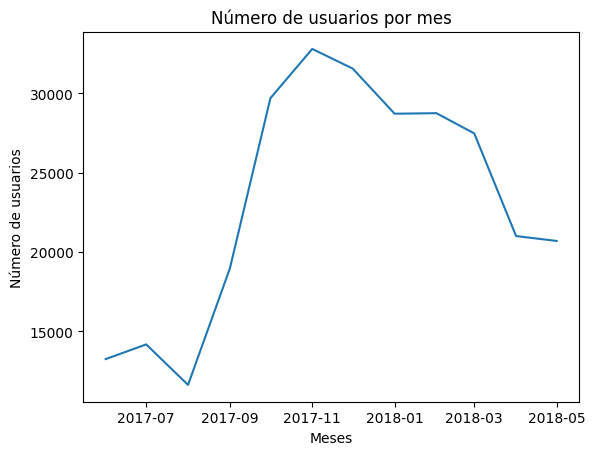

In [97]:
plt.title('Número de usuarios por mes')
sns.lineplot(data=mau_total, x='session_month',y='number_of_users')
plt.xlabel('Meses')
plt.ylabel('Número de usuarios')
print(mau_total['number_of_users'].mean().round(2))

En promedio 23228 usuarios(as) visitan la página web cada mes. Similar a los gráficos anteriores, se puede ver que el número de usuarios aumenta en los últimos meses del 2017, yendo de menos de 15000 usuarios en agosto del 2017 a más de 30000 usuarios en diciembre del 2017. Sin embargo, se registra un descenso paulatino en los siguientes meses del 2018.

**¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).**

In [23]:
sessions_per_day = visits.groupby('session_date').agg({'uid':['count','nunique']})
sessions_per_day.columns = ['n_sessions','n_users']
sessions_per_day['n_sessions_per_user'] = sessions_per_day['n_sessions']/sessions_per_day['n_users']

sessions_per_day

,n_sessions,n_users,n_sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


Text(0.5, 1.0, 'Número de sesiones por usuario a lo largo de los meses')

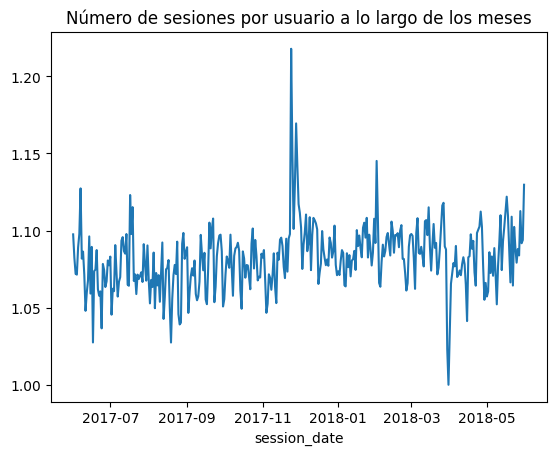

In [24]:
sessions_per_day['n_sessions_per_user'].plot()
plt.title('Número de sesiones por usuario a lo largo de los meses')

In [25]:
print(sessions_per_day['n_sessions_per_user'].mean().round(2))

1.08


En promedio, la página registra 1 sesión por usuario cada día. Además, el gráfico muestra que a lo largo de los meses, el número de sesiones por usuario(a) tiende a ser de 1. 

**¿Cuál es la duración de cada sesión?**

In [26]:
visits['session_duration_min'] = (((visits['end_ts'] - visits['start_ts']).dt.seconds)%3600)//60
visits['session_duration_min'].describe()

count    359400.000000
mean          9.386113
std          11.231863
min           0.000000
25%           1.000000
50%           5.000000
75%          13.000000
max          59.000000
Name: session_duration_min, dtype: float64

Text(0.5, 1.0, 'Distribución de la duración de las sesiones en minutos')

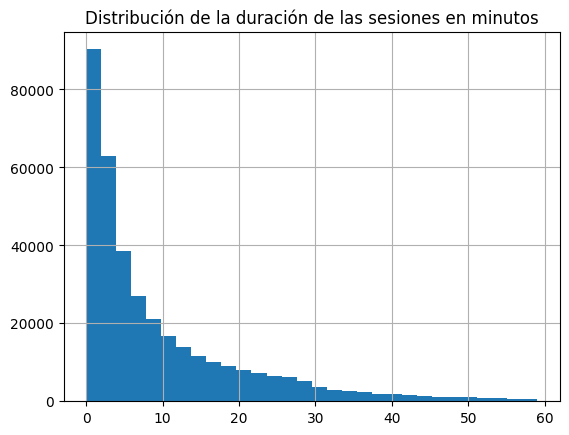

In [27]:
visits['session_duration_min'].hist(bins=30)
plt.title('Distribución de la duración de las sesiones en minutos')

In [28]:
# la variable session_duration_min no tiene una distribución normal, por lo que se calculará la moda para saber cuál es la duración de la sesión
print(visits['session_duration_min'].mode())

0    1
dtype: int64


**Las sesiones duran generalmente 1 minuto**

**¿Con qué frecuencia los usuarios y las usuarias regresan?**

In [29]:
#Obtener una tabla que contenga la fecha de la primera visita de cada usuario.
first_visits = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()

In [30]:
# Crear una columna en first_visits que contenga el mes de la fecha de la primera visita.
first_visits['first_visit_dt'] = first_visits['start_ts'].dt.date
first_visits['first_visit_month'] = first_visits['first_visit_dt'].values.astype('datetime64[M]')

In [31]:
#Crear una nueva tabla que sea el resultado del merge entre visits y first_visits. 
visits_full= visits.merge(first_visits, on= 'uid')
visits_full

,device,end_ts,source_id,start_ts_x,uid,session_year,session_month,session_week,session_date,session_duration_min,start_ts_y,first_visit_dt,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,18,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,28,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,24,2018-03-09 20:05:00,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,28,2018-03-09 20:05:00,2018-03-09,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018,2018-04-01,2018-04-19,2018-04-23,8,2018-04-23 21:11:00,2018-04-23,2018-04-01
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017,2017-11-01,2017-11-02,2017-11-08,0,2017-11-08 13:39:00,2017-11-08,2017-11-01
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017,2017-07-01,2017-07-27,2017-07-31,18,2017-07-31 12:13:00,2017-07-31,2017-07-01
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018,2018-03-01,2018-03-15,2018-03-20,14,2018-03-20 15:11:00,2018-03-20,2018-03-01


In [32]:
visits_full['age']=(visits_full['session_month']-visits_full['first_visit_month'])/np.timedelta64(1,"M")
visits_full["age"] = visits_full["age"].round().astype("int")
visits_full

,device,end_ts,source_id,start_ts_x,uid,session_year,session_month,session_week,session_date,session_duration_min,start_ts_y,first_visit_dt,first_visit_month,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,18,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,28,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,24,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,28,2018-03-09 20:05:00,2018-03-09,2018-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018,2018-04-01,2018-04-19,2018-04-23,8,2018-04-23 21:11:00,2018-04-23,2018-04-01,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017,2017-11-01,2017-11-02,2017-11-08,0,2017-11-08 13:39:00,2017-11-08,2017-11-01,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017,2017-07-01,2017-07-27,2017-07-31,18,2017-07-31 12:13:00,2017-07-31,2017-07-01,0
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018,2018-03-01,2018-03-15,2018-03-20,14,2018-03-20 15:11:00,2018-03-20,2018-03-01,0


In [33]:
cohorts_ = visits_full.groupby(['first_visit_month','age']).agg({'uid':'nunique'}).reset_index()
cohorts_

,first_visit_month,age,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [34]:
initial_users_count = cohorts_[cohorts_['age']==0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)
print(initial_users_count)

   first_visit_month  cohort_users
0         2017-06-01         13259
12        2017-07-01         13140
23        2017-08-01         10181
33        2017-09-01         16704
42        2017-10-01         25977
50        2017-11-01         27248
57        2017-12-01         25268
63        2018-01-01         22624
68        2018-02-01         22197
72        2018-03-01         20589
75        2018-04-01         15709
77        2018-05-01         15273


In [35]:
cohorts_ = cohorts_.merge(initial_users_count,on='first_visit_month')
cohorts_

,first_visit_month,age,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [36]:
cohorts_['retention_rate'] = cohorts_['uid']/cohorts_['cohort_users']
retention_pivot = cohorts_.pivot_table(index='first_visit_month',columns='age',values='retention_rate',aggfunc='sum')

retention_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tasa de retención de usuarios por cohortes'}, xlabel='age', ylabel='first_visit_month'>

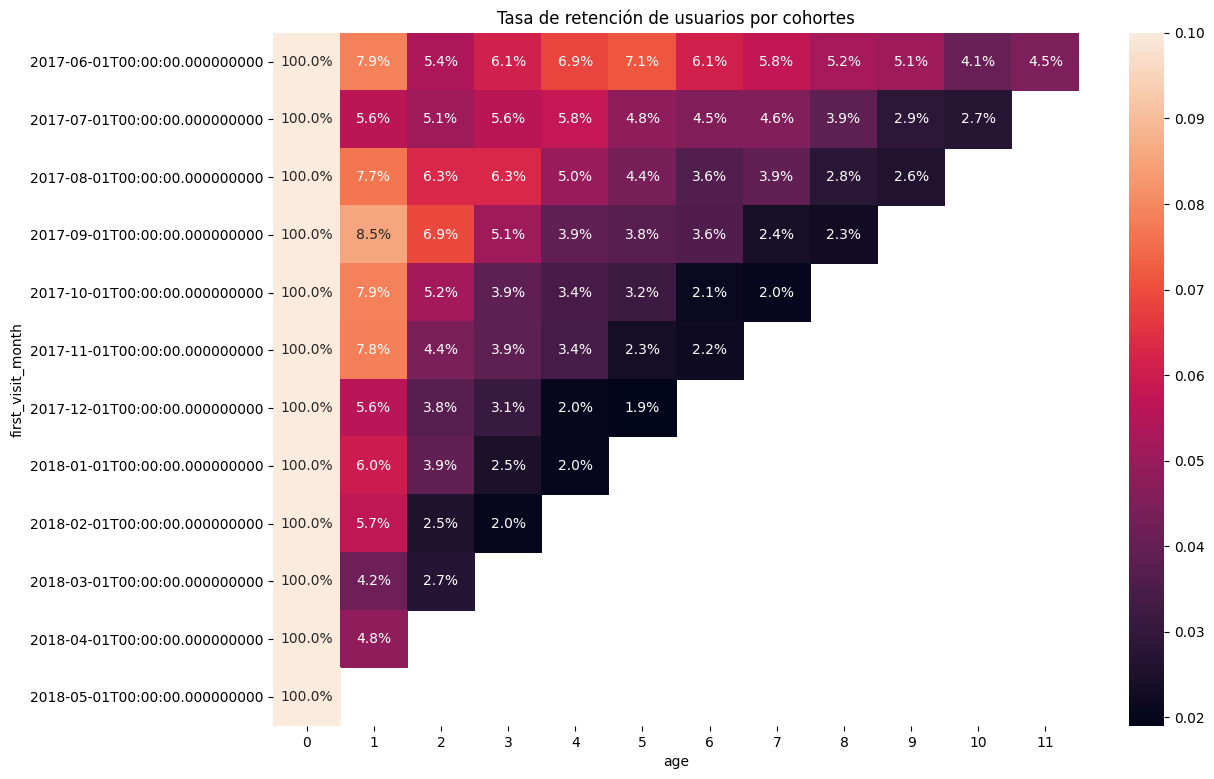

In [37]:
plt.figure(figsize=(13,9))
plt.title('Tasa de retención de usuarios por cohortes')
sns.heatmap(retention_pivot,annot=True,fmt='.1%', vmax = .1)

El mapa de calor muestra que, en general, la tasa de retención para todas las cohortes desde el primer mes es bastante baja, pues para todas las cohortes solo entre el 4% y 8% de usuarios regresan a la página. A partir de los siguientes meses, la tasa de retención sigue bajando para casi todas las cohortes, de manera que hacia el final del ciclo de vida la tasa de retención para casi todas las cohortes es alrededor del 2% a excepción de la primera cohorte (junio del 2017) cuya tasa de retención se mantiene entre el 4% y 7% durante todo el ciclo de vida.

### Ventas

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo)

In [38]:
# se determinará la fecha de la primera orden de cada usuario  
first_order_date_by_customers = orders.groupby("uid")["buy_ts"].min()
print(first_order_date_by_customers)

uid
10000837700716403746   2017-06-21 16:12:00
10000997030965831953   2018-01-19 12:28:00
10001199569370567060   2017-11-25 17:29:00
10002243978166172255   2017-10-15 17:20:00
10003351403065971701   2017-11-20 13:18:00
                               ...        
999745712858219747     2017-08-08 17:53:00
9997777271989789335    2017-11-17 16:36:00
999906621142257600     2018-01-26 22:16:00
9999334409150825432    2017-12-06 13:28:00
9999407206938542587    2018-02-14 19:50:00
Name: buy_ts, Length: 36523, dtype: datetime64[ns]


In [39]:
first_order_date_by_customers.name = "first_order_date"

In [40]:
orders= orders.merge(first_order_date_by_customers, on="uid")
print(orders.head(10))

               buy_ts  revenue                   uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:54:00
7 2017-06-05 14:30:00     7.33  12464626743129688638 2017-06-01 08:54:00
8 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00
9 2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00


In [41]:
# se determinará la fecha de la primera sesión de cada cliente para formar las cohortes
first_session_date_by_customers = visits.groupby("uid")["start_ts"].min()
print(first_session_date_by_customers)

uid
10000171586432207426   2017-12-01 15:11:00
10000344846682484395   2018-02-21 16:01:00
1000036778515242839    2017-09-05 20:22:00
10000460875579931334   2017-09-13 09:12:00
10000558740593440652   2018-01-03 18:39:00
                               ...        
9999530179466660745    2017-06-14 14:33:00
9999704916412649026    2017-06-29 23:04:00
9999829453910784044    2017-11-09 15:32:00
9999912853550499774    2017-08-18 09:23:00
9999996800317156310    2017-11-24 17:22:00
Name: start_ts, Length: 228169, dtype: datetime64[ns]


In [42]:
first_session_date_by_customers.name = "first_session_date"
visits= visits.merge(first_session_date_by_customers, on="uid")

In [43]:
# se unirán ambos dataframes para poder realizar el análisis
merged_df = pd.merge(visits, orders, left_on='uid', right_on='uid', how='inner')
merged_df

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_min,first_session_date,buy_ts,revenue,first_order_date
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,24,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,28,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,1,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,1,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,1,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017,2017-12-01,2017-11-30,2017-12-04,8,2017-12-04 12:42:00,2017-12-04 12:46:00,4.15,2017-12-04 12:46:00
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017,2017-11-01,2017-11-16,2017-11-20,11,2017-11-20 23:33:00,2017-11-20 23:43:00,3.67,2017-11-20 23:43:00
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017,2017-11-01,2017-11-23,2017-11-29,21,2017-11-29 20:27:00,2017-11-29 20:33:00,3.05,2017-11-29 20:33:00
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018,2018-04-01,2018-04-19,2018-04-23,8,2018-04-23 21:11:00,2018-04-23 21:16:00,0.49,2018-04-23 21:16:00


In [44]:
# se restará la fecha de la primera orden de la fecha de la primera sesión para determinar el tiempo de conversión
merged_df["time_to_conversion"] = (merged_df["first_order_date"]-merged_df["first_session_date"])


In [45]:
# se extraen los días del tiempo de conversión
merged_df["days_to_conversion"]= merged_df["time_to_conversion"].dt.days

In [46]:
# se extrae el mes de la fecha de la primera sesión para formar las cohortes
merged_df["first_session_month"] = merged_df["first_session_date"].astype('datetime64[M]')

<AxesSubplot:>

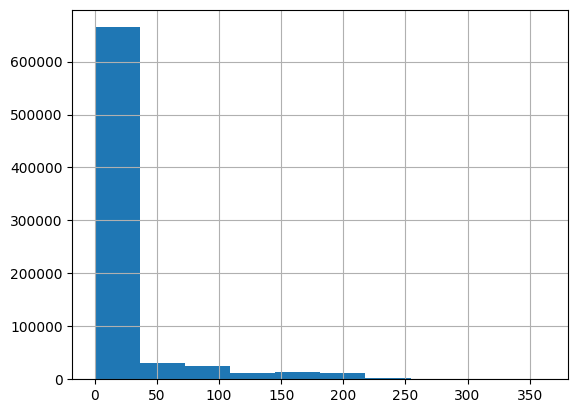

In [47]:
merged_df["days_to_conversion"].hist()

In [48]:
cohorts_conversion_stats = merged_df.groupby("first_session_month")['days_to_conversion'].median().reset_index()
cohorts_conversion_stats = cohorts_conversion_stats.set_index("first_session_month")
cohorts_conversion_stats

,days_to_conversion
first_session_month,
2017-06-01,1
2017-07-01,35
2017-08-01,1
2017-09-01,13
2017-10-01,2
2017-11-01,2
2017-12-01,0
2018-01-01,0
2018-02-01,0


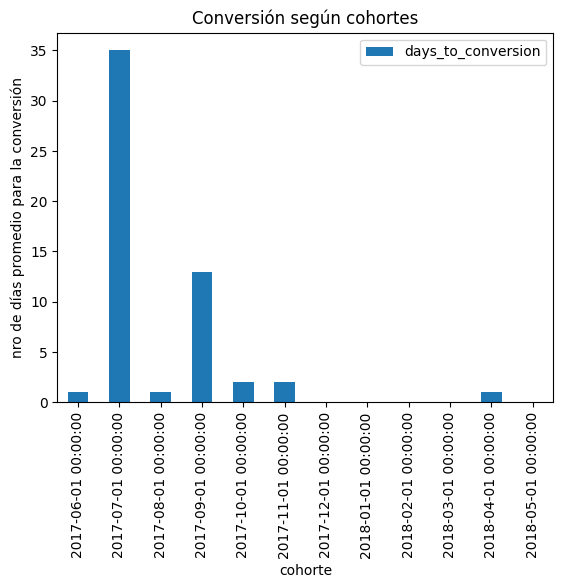

In [49]:
cohorts_conversion_stats.plot(kind='bar',title='Conversión según cohortes' , xlabel="cohorte" , ylabel="nro de días promedio para la conversión")
plt.show()

El gráfico de barras muestra que las cohortes del 2017 tuvieron un tiempo de conversión promedio mayor que las cohortes que tuvieron su primera sesión en 2018. Por ejemplo, se puede ver que las cohortes de julio y septiembre  2017 le tomó 35 y 13 días en promedio para hacer su primera compra. Sin embargo, a partir de la cohorte de noviembre del 2017 en adelante se puede ver que a los usuarios les toma menos de 5 días en promedio para realizar su primera compra en la página. 

In [50]:
#se agrupará el Dataframe por fuente de adquisión para explorar el tiempo de conversión de acuerdo a dicho criterio
source_conversion_stats = merged_df.groupby("source_id").agg({"days_to_conversion":"median"}).reset_index()
source_conversion_stats = source_conversion_stats.set_index("source_id")
source_conversion_stats

,days_to_conversion
source_id,
1,4
2,1
3,1
4,2
5,0
7,0
9,5
10,0


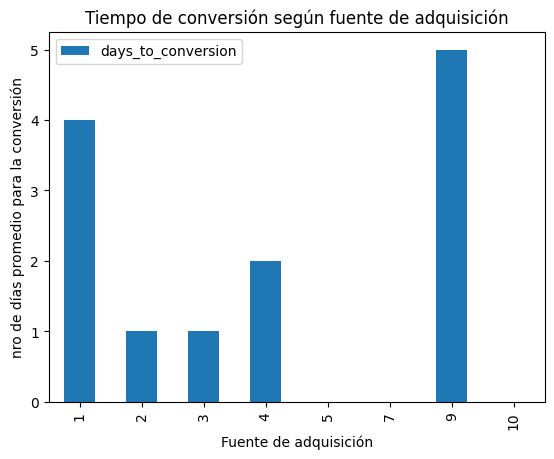

In [51]:
source_conversion_stats.plot(kind='bar',title='Tiempo de conversión según fuente de adquisición' , xlabel="Fuente de adquisición" , ylabel="nro de días promedio para la conversión")
plt.show()

De acuerdo al gráfico, la fuente 5, 7 y 10 son las que tienen un menor tiempo de conversión promedio (menos de un día), por lo que se podría considerar que son las más eficientes al momento de generar ventas. Otras fuentes que también tienen un tiempo de conversión relativamente bajo son las fuente 2 y 3 con 1 día en promedio. Por otra parte, los usuarios que acceden a las páginas a través de las fuentes 1 y 9 se demoran más en realizar su primera compra, pues dichas fuentes registran un tiempo de conversión de 4 y 5 días respectivamente. 

**¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [52]:
#Cuando intentes los análisis de las compras y el tamaño promedio de compra la característica de los usuarios es el mes de la primera compra, lo cual se agrupara junto con el mes de compra. 
#La principal diferencia entre estos análisis es la operación que se realice al momento de agrupar. Para el primero la operación simplemente será un conteo del número de compras, mientras que para la segunda será el promedio o la mediana del revenue

orders['first_order_month'] = orders['first_order_date'].values.astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01


In [53]:
#se agruparán las órdenes por mes y se calcularán cuántos usuarios hicieron una orden en cada mes
orders['age']=(orders['order_month']-orders['first_order_month'])/np.timedelta64(1,"M")
orders["age"] = orders["age"].round().astype("int")
orders


,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,0


In [54]:
orders_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'uid':'count'})["uid"].reset_index()
orders_by_cohorts

,first_order_month,order_month,uid
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [55]:
cohorts_1 = orders.pivot_table(index='first_order_month',
              columns='age',
              values='uid',
              aggfunc='count').cumsum(axis=1)
cohorts_1

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2354.0,2531.0,2705.0,2931.0,3223.0,3441.0,3717.0,3891.0,4103.0,4256.0,4352.0,4438.0
2017-07-01,2186.0,2286.0,2406.0,2510.0,2582.0,2664.0,2725.0,2775.0,2833.0,2857.0,2910.0,NaN
2017-08-01,1533.0,1641.0,1741.0,1822.0,1907.0,1969.0,2018.0,2096.0,2142.0,2188.0,NaN,NaN
2017-09-01,2933.0,3152.0,3313.0,3477.0,3544.0,3653.0,3761.0,3817.0,3878.0,NaN,NaN,NaN
2017-10-01,4964.0,5278.0,5440.0,5562.0,5691.0,5794.0,5880.0,6005.0,NaN,NaN,NaN,NaN
2017-11-01,4813.0,5210.0,5392.0,5603.0,5739.0,5798.0,5900.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,5052.0,5322.0,5524.0,5703.0,5789.0,5894.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3783.0,4007.0,4166.0,4230.0,4308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4095.0,4317.0,4400.0,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cantidad de pedidos por cohortes'}, xlabel='age', ylabel='first_order_month'>

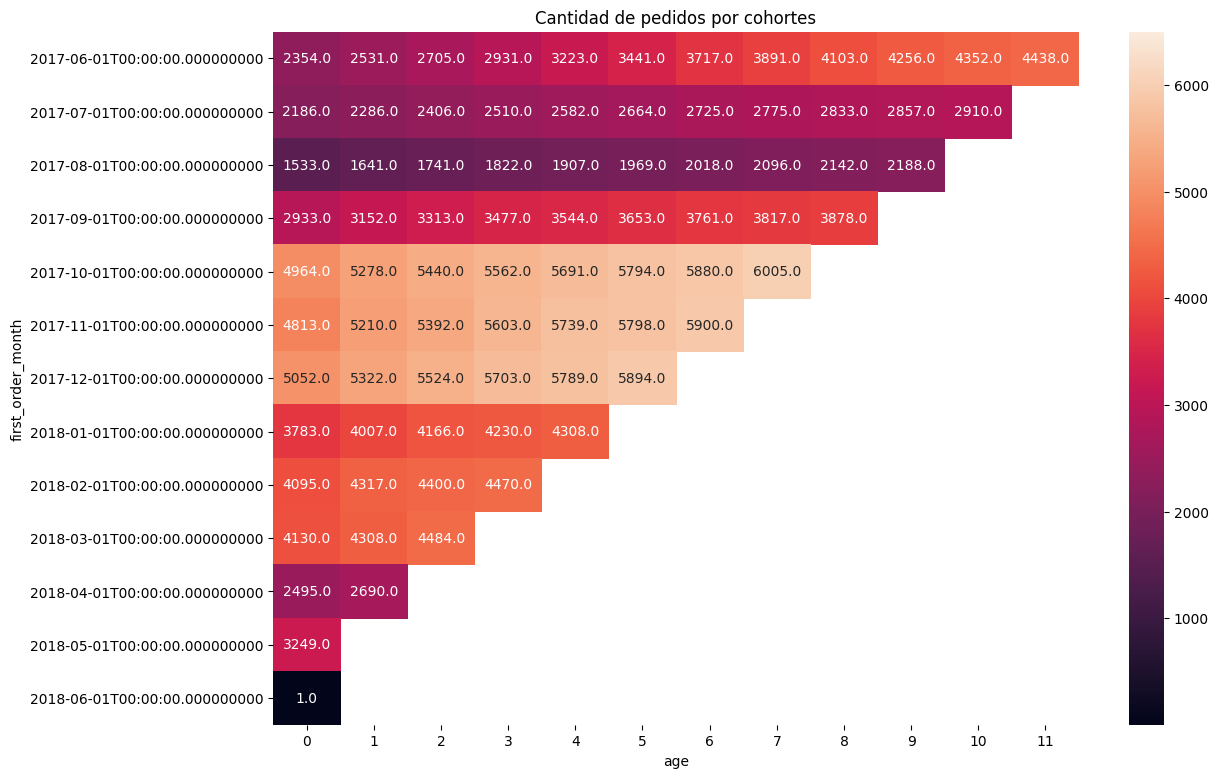

In [56]:
plt.figure(figsize=(13,9))
plt.title('Cantidad de pedidos por cohortes')
sns.heatmap(cohorts_1,annot=True,fmt='.1f',vmax=6500)

El mapa de calor muestra que las cohortes de octubre, noviembre y diciembre de 2017 son las que tienen mayor acumulación de pedidos a lo largo del ciclo de vida llegando a registrar entre 5894 y 6005 pedidos hacia el último mes. A su vez, las cohortes de enero, febrero y marzo del 2018 también registran un rendimiento sostenido relativamente bueno. Además, la primera cohorte (junio del 2017) muestra un aumento paulatino en la cantidad de órdenes a lo largo del ciclo de vida, llegando a acumular 4438 órdenes para el último mes. Por otra parte, se puede ver que las cohortes de julio y agosto del 2017 son las que tienen peor rendimiento, ya que acumularon menos de 3000 órdenes a lo largo del ciclo de vida.

**¿Cuál es el tamaño promedio de compra?**

In [57]:
#se explorará el tamaño o ingreso promedio por mes
revenue_monthly = orders.groupby(['first_order_month','order_month'])['revenue'].mean().round()
revenue_monthly = revenue_monthly.reset_index()
revenue_monthly = revenue_monthly.set_index("first_order_month")
revenue_monthly

,order_month,revenue
first_order_month,,
2017-06-01,2017-06-01,4.0
2017-06-01,2017-07-01,6.0
2017-06-01,2017-08-01,5.0
2017-06-01,2017-09-01,9.0
2017-06-01,2017-10-01,7.0
...,...,...
2018-03-01,2018-05-01,6.0
2018-04-01,2018-04-01,4.0
2018-04-01,2018-05-01,6.0


In [58]:
cohorts_revenue = orders.pivot_table(index='first_order_month',columns='age',values='revenue',aggfunc='mean')
cohorts_revenue

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07-01,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08-01,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN,NaN
2017-09-01,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN,NaN,NaN
2017-10-01,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN,NaN,NaN,NaN
2017-11-01,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.687417,4.438482,6.454969,7.524844,2.711282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.706266,4.576486,3.453735,3.867143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tamaño promedio de compras por cohortes durante el ciclo de vida'}, xlabel='age', ylabel='first_order_month'>

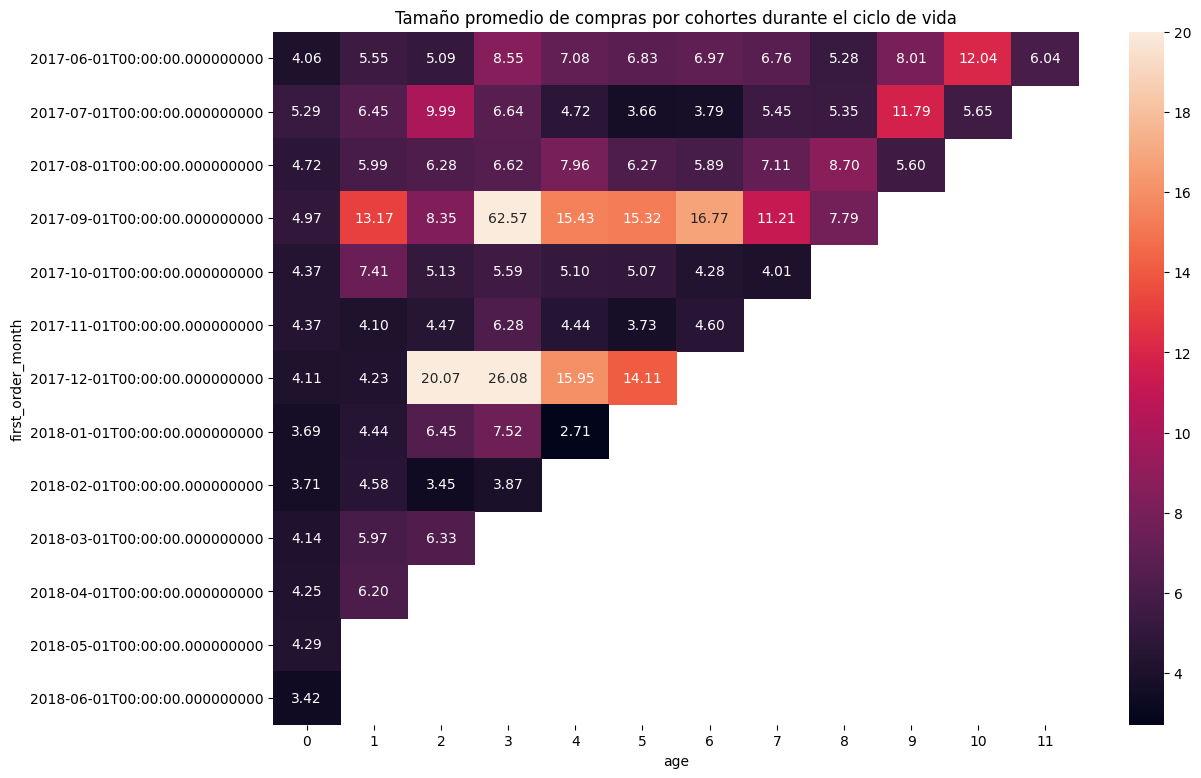

In [59]:
plt.figure(figsize=(13,9))
plt.title('Tamaño promedio de compras por cohortes durante el ciclo de vida')
sns.heatmap(cohorts_revenue,annot=True,fmt='.2f',vmax='20')

De acuerdo al gráfico, se puede ver que en el primer mes del ciclo de vida todas las cohortes tuvieron un ingreso promedio bajo entre los 3 y 5 dólares en promedio. Después del primer mes, los ingresos varían a lo largo de los meses, ya que para algunas cohortes descienden, pero para otras aumentan. Sin embargo, se puede ver que, en el cuarto mes, la cohorte de septiembre del 2017 generó un ingreso promedio de 62,27 dólares y la cohorte de diciembre generó un ingreso promedio de 26,08 dólares. Además, en los meses posteriores los ingresos que suelen registrar dichas cohortes tienden a ser mayores que en el resto del ciclo de vida.

In [60]:
#se explorará el ingreso promedio según fuente de adquisición
revenue_by_source = merged_df.groupby('source_id')['revenue'].mean()
revenue_by_source

source_id
1      9.242265
2     11.071013
3      6.344095
4      7.923842
5      7.781887
7      1.220000
9      3.806667
10     3.630303
Name: revenue, dtype: float64

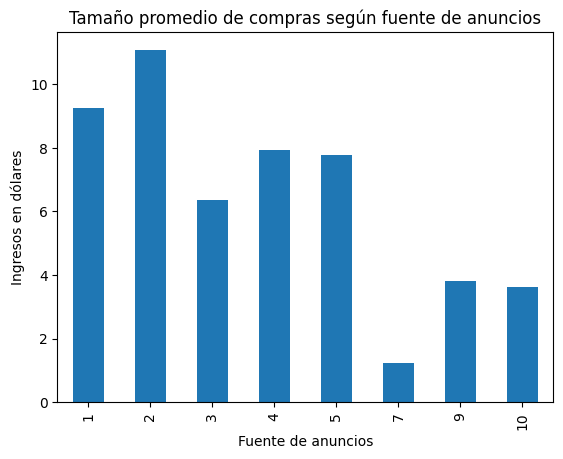

In [61]:
revenue_by_source.plot(kind="bar",xlabel="Fuente de anuncios",ylabel="Ingresos en dólares",title="Tamaño promedio de compras según fuente de anuncios")
plt.show()

De acuerdo al gráfico de barras, las ventas que provienen de la fuente de anuncios 2 son las que generan más ingresos (11 dólares en promedio). Otras fuentes de anuncios que generan ingresos son las fuentes 1,4 y 5 con ventas de alrededor 8 USD en promedio. Por otro lado, la fuente de anuncios 7 es la que genera menos ingresos con ventas de 1 dólar en promedio. 

**¿Cuánto dinero traen? (LTV)**

In [62]:
orders["order_year"] = orders["buy_ts"].dt.year
orders["order_month"] = orders["buy_ts"].astype("datetime64[M]")
orders["first_order_month"] = orders["first_order_date"].astype("datetime64[M]")


In [63]:
# se agrupan las órdenes por el primer mes de las compras y se obtienen la cantidad de uid únicas para saber cuántos clientes se tuvo por cohorte
cohort_sizes= orders.groupby("first_order_month").agg({"uid":"nunique"}).reset_index()
cohort_sizes.columns = ["first_order_month","n_buyers"]
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [64]:
# se genera otro dataframe para obtener el ingreso total por cada mes de la primera compra
cohorts = orders.groupby(["first_order_month","order_month"]).agg({"revenue":"sum"}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [65]:
# se unen ambos dataframes para después dividir el ingreso total entre el nro de clientes por mes de la primera compra
report= pd.merge(cohort_sizes,cohorts,on="first_order_month")
report

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [66]:
# se calcula los meses transcurridos entre la fecha de la orden y la fecha de la primera orden para obtener el ciclo de vida de cada cohorte
report["age"] = (report["order_month"]-report["first_order_month"])/np.timedelta64(1,"M")
report["age"] = report["age"].round().astype("int")
report

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [67]:
report["LTV"] = report["revenue"]/report["n_buyers"]
output_2 = report.pivot_table(
    index="first_order_month",
    columns = "age", 
    values="LTV",
    aggfunc="mean"
).cumsum(axis=1)
output_2.fillna(" ")

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


<AxesSubplot:title={'center':'LTV por cohortes a lo largo del ciclo de vida'}, xlabel='age', ylabel='first_order_month'>

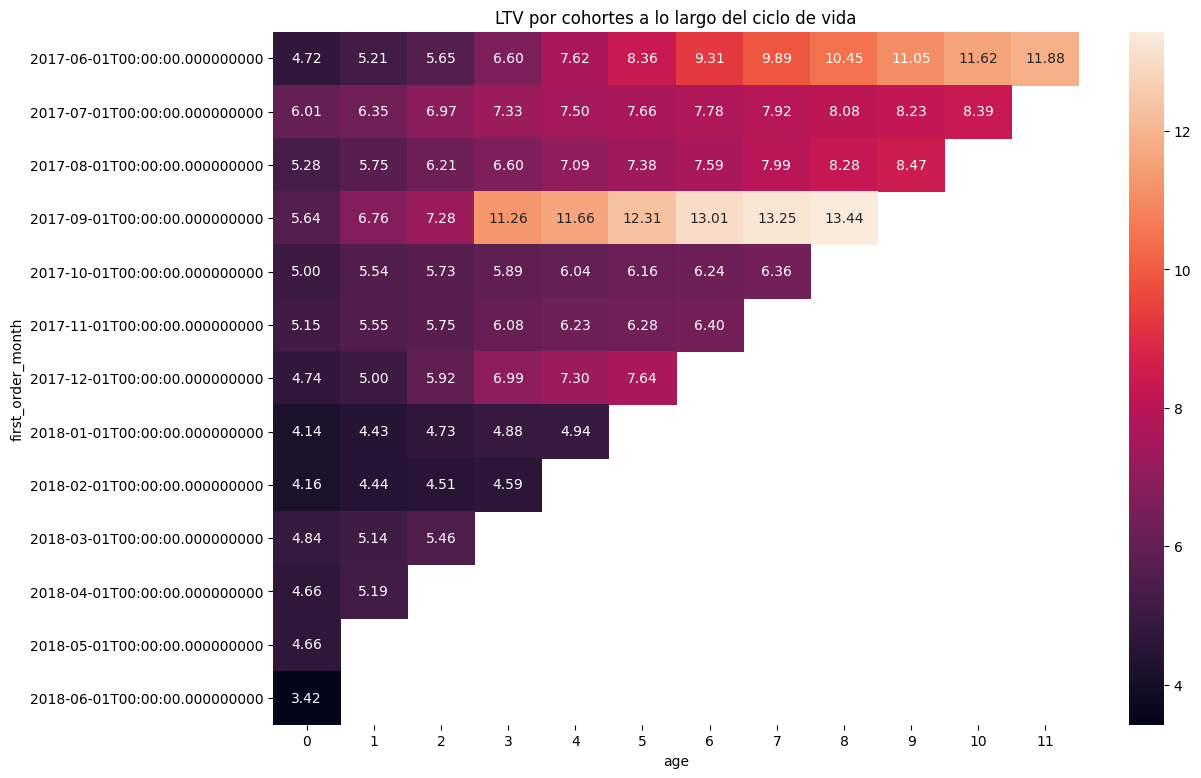

In [68]:
plt.figure(figsize=(13,9))
plt.title("LTV por cohortes a lo largo del ciclo de vida")
sns.heatmap(output_2,annot=True,fmt='.2f')

El mapa de calor muestra que en promedio los clientes en el primer mes del ciclo de vida aportan entre 3 a 6 dólares, pero en los siguientes meses, por lo general, no siguen realizando compras que generen más ingresos para la empresa o en todo caso el incremento a lo largo de los meses es muy pequeño. Sin embargo, se destaca  que el aporte de la cohorte de setiembre del 2017 incrementa notablemente a partir del cuarto mes, llegando a un aporte acumulado de 13,4 dólares hacia el final del ciclo de vida. Además, la cantidad promedio que aporta la primera cohorte también desmuestra un incremento paulatino a lo largo del tiempo, con un aporte acumulado de 11,8 dólares en promedio.  

### Marketing

**¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

In [69]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [70]:
costs['costs_month']= costs["dt"].dt.month
mkt_costs = costs.pivot_table(
    index = "source_id",
    columns = "costs_month",
    values = "costs",
    aggfunc = "sum"
)
mkt_costs

costs_month,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,2186.18,2204.48,1893.09,1327.49,1467.61,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20
2,4157.74,4474.34,3943.14,2993.70,2689.44,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80
3,14808.78,14228.56,13080.85,9296.81,9411.42,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52
4,5832.79,5711.96,5961.87,4408.49,4214.21,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47
5,5371.52,5071.31,4529.62,3501.15,3669.56,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52
9,547.16,551.50,480.29,373.49,362.17,285.22,302.54,248.93,415.62,609.41,683.18,657.98
10,614.35,480.88,526.41,388.25,409.86,314.22,329.82,232.57,460.67,627.24,792.36,645.86


<AxesSubplot:title={'center':'Costos mensuales de marketing por fuente de adquisición'}, xlabel='costs_month', ylabel='source_id'>

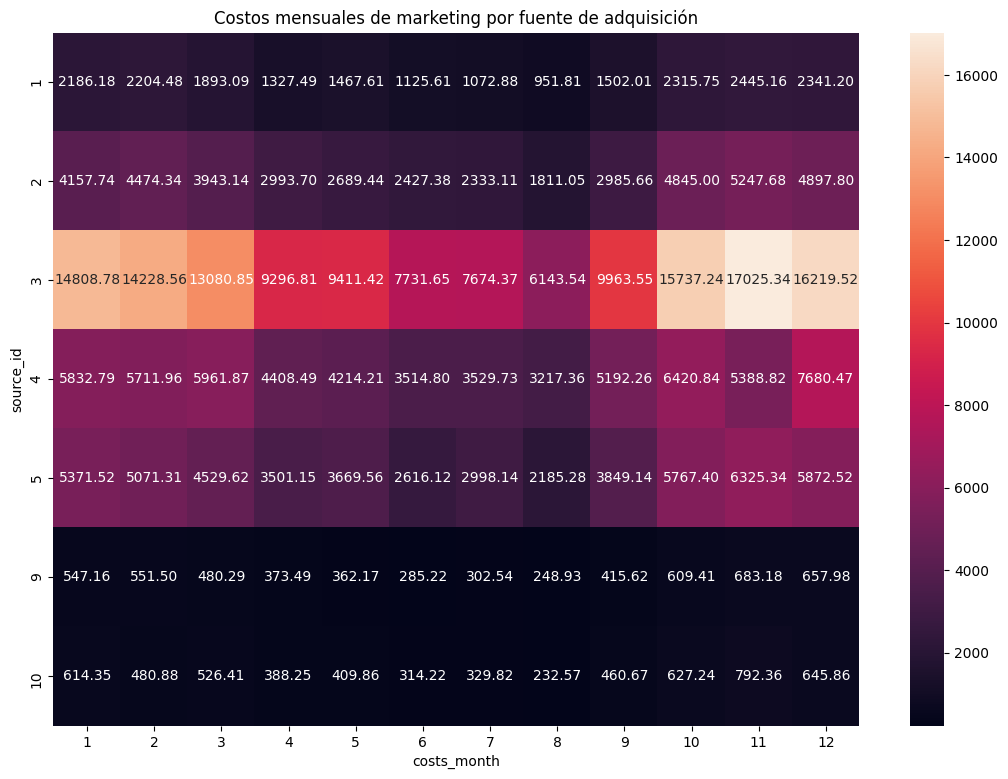

In [71]:
plt.figure(figsize=(13,9))
plt.title("Costos mensuales de marketing por fuente de adquisición")
sns.heatmap(mkt_costs,annot=True,fmt='.2f')

El mapa de calor demuestra que se gastó más en la fuente de adquisición 3, particularmente en los últimos 3 meses con gastos entre 15737 y 17025 dólares al mes. Por otro lado, se ha gastado poco en las fuentes de adquisición 1, 9 y 10, pues los gastos no superan los 800 dólares.

**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC)**

In [74]:
first_order_date_by_customers = first_order_date_by_customers.reset_index(drop=True)
first_session_date_by_customers =  first_session_date_by_customers.reset_index(drop=True)


In [75]:
buyers = first_order_date_by_customers.merge(first_session_date_by_customers, on = 'uid',how='left')
buyers

,uid,first_order_date,first_session_date
0,10000837700716403746,2017-06-21 16:12:00,2017-06-08 10:12:00
1,10000997030965831953,2018-01-19 12:28:00,2018-01-19 11:16:00
2,10001199569370567060,2017-11-25 17:29:00,2017-11-25 17:26:00
3,10002243978166172255,2017-10-15 17:20:00,2017-10-15 17:18:00
4,10003351403065971701,2017-11-20 13:18:00,2017-11-20 13:17:00
...,...,...,...
36518,999745712858219747,2017-08-08 17:53:00,2017-08-08 15:12:00
36519,9997777271989789335,2017-11-17 16:36:00,2017-11-17 16:35:00
36520,999906621142257600,2018-01-26 22:16:00,2018-01-26 22:05:00
36521,9999334409150825432,2017-12-06 13:28:00,2017-12-06 13:26:00


In [76]:
visits = visits.sort_values(by = 'start_ts')
visits_source = visits.groupby('uid').first().reset_index()
visits_source = visits_source[['uid','source_id']]

In [77]:
buyers_2 = buyers.merge(visits_source, on = 'uid')
buyers_2

,uid,first_order_date,first_session_date,source_id
0,10000837700716403746,2017-06-21 16:12:00,2017-06-08 10:12:00,4
1,10000997030965831953,2018-01-19 12:28:00,2018-01-19 11:16:00,4
2,10001199569370567060,2017-11-25 17:29:00,2017-11-25 17:26:00,4
3,10002243978166172255,2017-10-15 17:20:00,2017-10-15 17:18:00,4
4,10003351403065971701,2017-11-20 13:18:00,2017-11-20 13:17:00,4
...,...,...,...,...
36518,999745712858219747,2017-08-08 17:53:00,2017-08-08 15:12:00,3
36519,9997777271989789335,2017-11-17 16:36:00,2017-11-17 16:35:00,3
36520,999906621142257600,2018-01-26 22:16:00,2018-01-26 22:05:00,2
36521,9999334409150825432,2017-12-06 13:28:00,2017-12-06 13:26:00,3


In [78]:
# se extraen la cantidad de clientes atraidos por cada una de las fuentes
n_buyers_1 = buyers_2[buyers_2['source_id'] == 1]['uid'].nunique()
n_buyers_2 = buyers_2[buyers_2['source_id'] == 2]['uid'].nunique()
n_buyers_3 = buyers_2[buyers_2['source_id'] == 3]['uid'].nunique()
n_buyers_4 = buyers_2[buyers_2['source_id'] == 4]['uid'].nunique()
n_buyers_5 = buyers_2[buyers_2['source_id'] == 5]['uid'].nunique()
n_buyers_9 = buyers_2[buyers_2['source_id'] == 9]['uid'].nunique()
n_buyers_10 = buyers_2[buyers_2['source_id'] == 10]['uid'].nunique()

n_buyers = pd.Series([n_buyers_1, n_buyers_2, n_buyers_3, n_buyers_4, n_buyers_5, n_buyers_9, n_buyers_10])
n_buyers

0     2899
1     3506
2    10473
3    10296
4     6931
5     1088
6     1329
dtype: int64

In [79]:
# se calculan los costos mensuales de cada fuente de anuncios
costs["dt_month"] = costs["dt"].astype("datetime64[M]")
mkt_costs_monthly = costs.groupby(["dt_month","source_id"])["costs"].sum().reset_index()
mkt_costs_monthly

,dt_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [80]:
total_cost= mkt_costs_monthly.groupby('source_id')['costs'].sum().reset_index().drop('source_id', axis=1)
total_cost

,costs
0,20833.27
1,42806.04
2,141321.63
3,61073.60
4,51757.10
5,5517.49
6,5822.49


Text(0.5, 0, 'Fuente de anuncios')

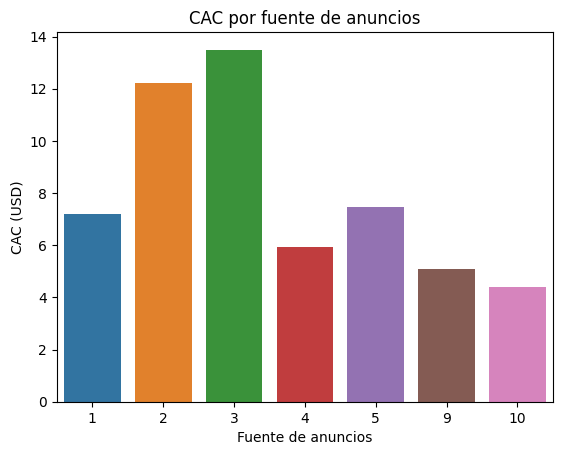

In [81]:
#Combinar info y visualizar
cac_per_id = pd.concat([n_buyers, total_cost], axis=1) 
cac_per_id.columns = ['n_buyers', 'total_costs']
cac_per_id.index = [1, 2, 3, 4, 5, 9, 10]
cac_per_id['cac'] = cac_per_id['total_costs'] / cac_per_id['n_buyers']
cac_per_id = cac_per_id.reset_index()
sns.barplot(data=cac_per_id, x='index', y='cac').set_title('CAC por fuente de anuncios')
plt.grid(False)
plt.ylabel('CAC (USD)')
plt.xlabel('Fuente de anuncios')

Se puede ver que las fuentes 2 y 3 presentan costos de adquisición más elevados, mientras que los costos de las fuentes 9 y 10 son mucho menores.

Se calculará el costo de adquisición mensual para obtener un análisis más detallado.

In [87]:

revenue_users = orders.groupby(['uid','first_order_month'])['revenue'].sum().reset_index()
buyers_2 = buyers_2.merge(revenue_users, on = 'uid', how='left')
cac_source = buyers_2.groupby(['source_id','first_order_month'])['uid'].count().reset_index()
cac_source.columns = ['source_id','first_order_month','n_user']

cac_source

costs["dt_month"] = costs["dt"].astype("datetime64[M]")


mkt_costs_monthly = costs.groupby(["dt_month","source_id"])["costs"].sum().reset_index()
cac_source_2 = cac_source.merge(mkt_costs_monthly, on="source_id",how="inner")
cac_source_2["cac"] = cac_source_2["costs"]/cac_source_2["n_user"].replace(0, np.nan)
cac_source_2

#CAC por fuente de adquisición
cac_per_source = cac_source_2.pivot_table(index="source_id", columns="dt_month",values="cac",aggfunc="mean")
cac_per_source.fillna("")
cac_per_source


dt_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,5.154307,4.912850,4.358455,6.877889,10.604105,11.196689,10.720643,10.010788,10.094586,8.668692,6.078740,6.720367
2,9.380720,9.016409,6.998885,11.538218,18.723721,20.279896,18.927769,16.067774,17.291289,15.238443,11.569289,10.393462
3,10.290117,10.213883,8.176489,13.260572,20.944824,22.659167,21.586694,19.709129,18.936909,17.409412,12.373202,12.525737
4,274.947557,276.115466,251.680116,406.167975,502.274459,421.544012,600.809850,456.273859,446.821852,466.371227,344.857048,329.659367
5,4.911399,5.628588,4.102557,7.226222,10.827487,11.874941,11.024835,10.084277,9.520675,8.503728,6.572919,6.889086
9,3.695032,3.919413,3.224894,5.384367,7.894921,8.850614,8.524147,7.088471,7.144696,6.222169,4.838572,4.691921
10,3.523587,3.698521,2.607983,5.165841,7.033717,8.885332,7.242517,6.889171,5.392471,5.903034,4.353741,4.596070


<AxesSubplot:title={'center':'Costo de adquisición de clientes por fuente de adquisición a lo largo del ciclo de vida'}, xlabel='dt_month', ylabel='source_id'>

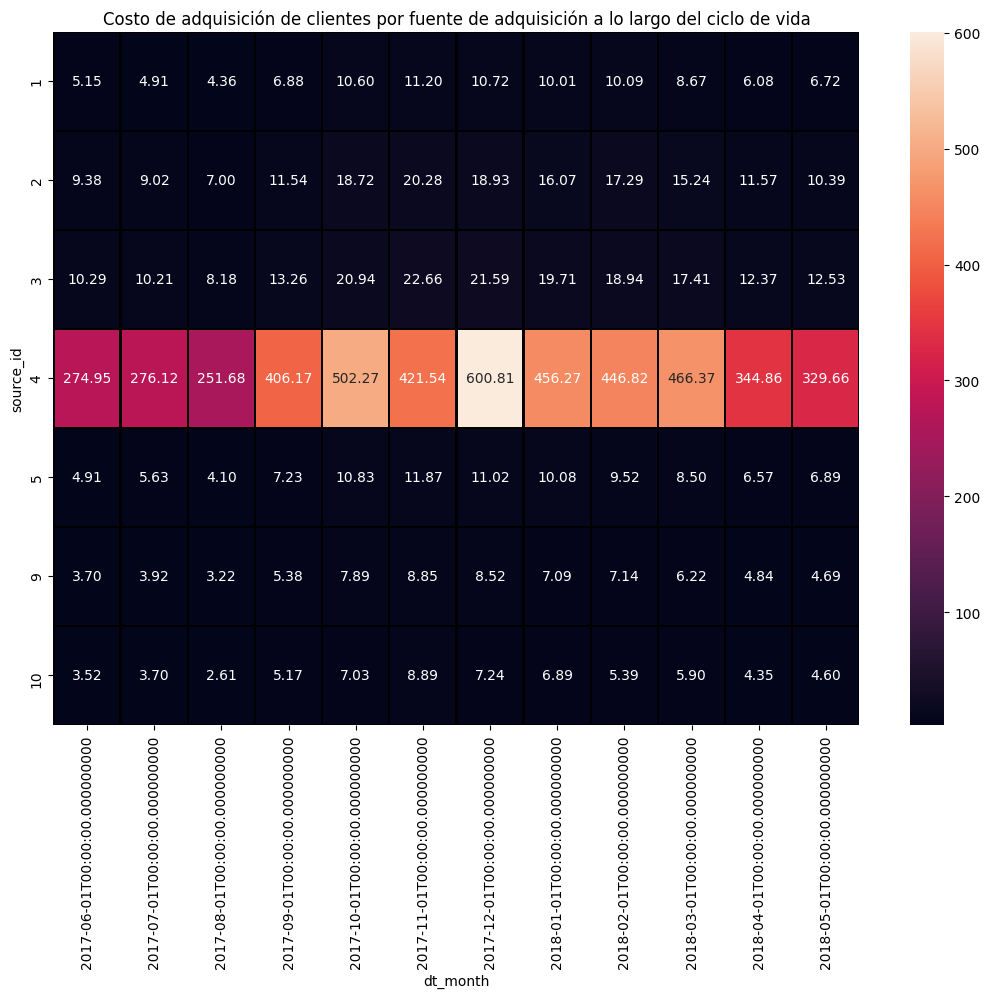

In [83]:
plt.figure(figsize=(13,9))
plt.title("Costo de adquisición de clientes por fuente de adquisición a lo largo del ciclo de vida")
sns.heatmap(cac_per_source,annot=True,fmt='.2f',linewidths=1,linecolor='black')

Al hacer el análisis mensual se puede ver claramente que la fuente 4 es la que tiene un costo de adquisición de clientes más alto  que el resto, de manera que se llegó a gastar 600 dólares en promedio para atraer a cada cliente en diciembre del 20217. Se analizará la cantidad de clientes atraídos por cada fuente para entender mejor la diferencia en los resultados de los análisis global y mensual.

In [88]:
buyers_per_source = buyers_2.groupby('source_id')['uid'].nunique().reset_index(name='n_clients')
print(buyers_per_source.sort_values('n_clients'))

   source_id  n_clients
5          7          1
6          9       1088
7         10       1329
0          1       2899
1          2       3506
4          5       6931
3          4      10296
2          3      10473


Las fuentes 3 y 4 atrajeron a una cantidad similar de clientes. Ello sugiere que la fuente 4 es ineficiente al incurrir en costos desproporcionados en relación con los clientes obtenidos. Asimismo, la fuente 3 también es ineficiente, pues solo logra atraer a 177 clientes más que la fuente 4 más a pesar de que tuvo una inversión significativamente mayor. 

**¿Cuán rentables eran las inversiones? (ROMI)**

In [89]:
romi_per_source = report.merge(cac_source_2,on='first_order_month')
romi_per_source["romi"] = romi_per_source["LTV"]/romi_per_source["cac"]
romi_per_source

,first_order_month,n_buyers,order_month,revenue,age,LTV,source_id,n_user,dt_month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,190,2017-06-01,1125.61,5.924263,0.797469
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,190,2017-07-01,1072.88,5.646737,0.836663
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,190,2017-08-01,951.81,5.009526,0.943086
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,190,2017-09-01,1502.01,7.905316,0.597625
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,190,2017-10-01,2315.75,12.188158,0.387623
...,...,...,...,...,...,...,...,...,...,...,...,...
6559,2018-06-01,1,2018-06-01,3.42,0,3.420000,4,1,2018-01-01,5832.79,5832.790000,0.000586
6560,2018-06-01,1,2018-06-01,3.42,0,3.420000,4,1,2018-02-01,5711.96,5711.960000,0.000599
6561,2018-06-01,1,2018-06-01,3.42,0,3.420000,4,1,2018-03-01,5961.87,5961.870000,0.000574
6562,2018-06-01,1,2018-06-01,3.42,0,3.420000,4,1,2018-04-01,4408.49,4408.490000,0.000776


In [93]:
report_romi = romi_per_source.pivot_table(index="source_id", columns="age", values="romi", aggfunc="mean")
report_romi = report_romi.cumsum(axis=1).round(2)
report_romi

age,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.75,0.82,0.88,1.01,1.06,1.10,1.15,1.18,1.22,1.25,1.29,1.33
2,0.44,0.48,0.52,0.58,0.61,0.64,0.66,0.68,0.70,0.72,0.75,0.77
3,0.40,0.44,0.47,0.53,0.56,0.58,0.61,0.62,0.64,0.66,0.68,0.69
4,0.80,0.88,0.95,1.07,1.12,1.17,1.21,1.24,1.27,1.29,1.33,1.35
5,0.73,0.80,0.86,0.98,1.03,1.07,1.12,1.15,1.19,1.22,1.25,1.28
9,1.08,1.17,1.27,1.45,1.52,1.58,1.65,1.70,1.75,1.80,1.86,1.90
10,1.24,1.35,1.44,1.61,1.68,1.74,1.82,1.88,1.93,1.98,2.05,2.11


<AxesSubplot:title={'center':'Rentabilidad de la inversión acumulada por fuente de adquisición a lo largo del ciclo de vida'}, xlabel='age', ylabel='source_id'>

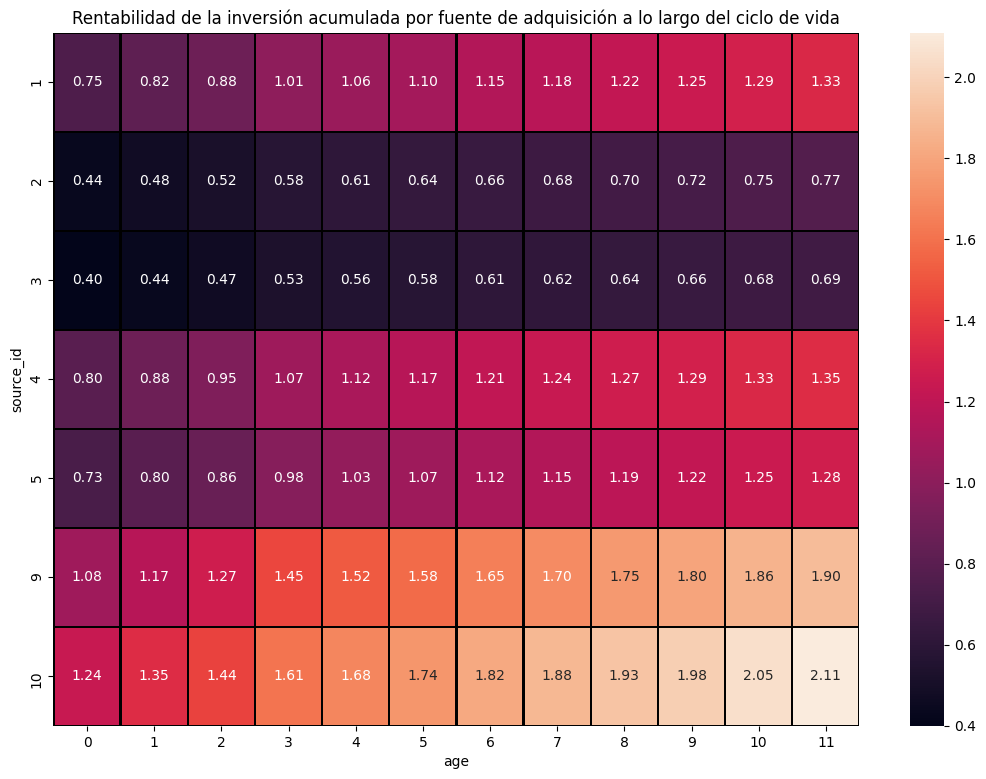

In [95]:
plt.figure(figsize=(13,9))
plt.title("Rentabilidad de la inversión acumulada por fuente de adquisición a lo largo del ciclo de vida")
sns.heatmap(report_romi,annot=True,fmt='.2f',linewidths=1,linecolor='black')

**Fuentes más rentables:**  
El gráfico muestra que las fuentes 9 y 10 son las más rentables.Desde el primer mes tienen un ROMI superior a 1 (recuperan lo invertido rápidamente) y continúan creciendo hasta superar el 2 al final del ciclo de vida.

**Fuentes con retorno moderado:**  
Las fuentes 1, 4 y 5 también logran un ROMI superior a 1, pero de manera más lenta. Requieren más tiempo para recuperar la inversión y alcanzar rentabilidad.

**Fuentes poco rentables:**  
Las fuentes 2 y 3 son las menos rentables. Incluso después de 12 meses, sus ROMI acumulados apenas se acercan a 0.77 y 0.69, respectivamente. Estas fuentes no logran recuperar su costo de adquisición de manera eficiente, posiblemente debido a un CAC muy alto o a un LTV bajo.

## Conclusiones

Después del análisis realizado se plantean las siguientes conclusiones y recomendaciones:

**Actividad de usuarios**

1. Existe un incremento en el número de sesiones diarias, semanales y mensuales hacia finales del 2017. Sin embargo, las sesiones tienden a descender después de diciembre del 2017. 

2. Además, se registran alrededor de 987 sesiones cada día en la página web. No obstante, las sesiones de la mayoría de los(as) usuarios(as) duran 1 minuto y la tasa de retención de todas las cohortes se ubican entre el 4% y 8%, por lo que es recomendable que se implementen cambios en el diseño de la página u otras medidas que promuevan que los(as) usuarios(as) pasen más tiempo viendo las servicios que se ofrecen en la página.

**Ventas** 

3. El análisis muestra que el tiempo de conversión ha ido mejorando con el tiempo, siendo menos de 10 días en promedio el 2018. Asimismo, la fuente 5 es la que tiene menor tiempo de conversión promedio, por lo que se recomienda seguir invertiendo en dicha fuente. A su vez, las fuentes 1 y 2 son las que generan más ingresos promedio por compra y no tienen un tiempo de conversión tan alto.

4. El LTV de la página es de 3 a 6 dólares durante el primer mes, pero no tiende a incrementar en los siguientes meses. 

5. En esa línea, cabe señalar que la primera cohorte tiene un incremento sostenido en la cantidad de órdenes y la cantidad de dinero que aportan a lo largo de todo el ciclo de vida, llegando a ser de 11.88 dólares. Por lo que se recomienda seguir promoviendo estrategias de fidelización para dichos clientes. 

**Marketing** 

5. La fuente en la que se invirtió más fue la fuente 3, llegando a doblar el gasto de otras fuentes.

6. Las fuentes 4 y 3 registran un costo de adquisición bastante alto a comparación de las demás fuentes mientras que las fuentes 9 y 10 son las que tienen los menores costos de adquisión tanto a nivel general como mensualmente. 

7. El análisis del ROMI acumulado a lo largo del tiempo, muestra que las fuentes 9 y 10 logran recuperar su inversión rápidamente y llegan a duplicarla incluso. Por otro lado, las fuentes 2 y 3 resultan ser las menos rentables con una rentabilidad acumulada de 0.77 y 0.69. 

**Recomendaciones**
1. Se recomienda detener la inversión en la fuente de publicidad 3, ya que su alto Costo de Adquisición de Clientes (CAC) no está generando ganancias y tampoco llega a recuperar la inversión. Redirigir el presupuesto hacia canales más rentables podría mejorar la eficiencia y la rentabilidad general de las campañas de marketing.

2. Priorizar inversión en las fuentes 9 y 10, ya que generan mayor retorno en menor tiempo y tienen un costo de adquisición bajo.

3. Optimizar las fuentes 1, 4 y 5, explorando formas de acelerar la recuperación de la inversión.

4. También se sugiere implementar mejoras en el diseño del sitio web o aplicar otras estrategias que fomenten que los usuarios pasen más tiempo explorando los servicios ofrecidos. Esto podría ayudar a incrementar la interacción y mejorar las tasas de conversión.

5. La primera cohorte muestra un aumento sostenido tanto en el número de pedidos como en los ingresos generados a lo largo de todo el ciclo de vida del cliente. Por ello, se recomienda continuar aplicando estrategias de fidelización para retener y maximizar el valor de estos clientes.